#  Since I am using Google Colab (limited RAM), I have downsized the data from a full data set to 20000 rows of data. All merging databases are based on the first 20000 applicants in "applications train" file.

In [ ]:
# !pip install pandas, numpy
import pandas as pd
import numpy as np

In [ ]:
pd.options.display.max_columns=None

data source : Kaggle

link: https://www.kaggle.com/competitions/home-credit-default-risk/data

non duplicates found!

since the original file was too big I am saving this file as a new csv to work with -- only 20000 rows are selected.

In [ ]:
from google.colab import files
uploads = files.upload()

In [ ]:
application_train = pd.read_csv('/content/application_train.csv')

In [ ]:
df_train = pd.read_csv("application_train.csv", nrows=20000)

In [ ]:
import os
os.remove("/content/application_train.csv")


In [ ]:
from google.colab import files
uploads = files.upload()

In [ ]:
df_train = pd.read_csv("/content/application_train_sample.csv")

In [ ]:
print(len(df_train["SK_ID_CURR"]))

20000


In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
bureau = pd.read_csv("/content/bureau.csv")

In [ ]:
bureau.sort_values(by="SK_ID_CURR", ascending=True, inplace=True)
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248484,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248490,100001,5896636,Active,currency 1,-320,0,411.0,NaN,NaN,0,168345.0,110281.5,NaN,0.0,Consumer credit,-10,9364.5
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0


In [ ]:
print(len(bureau['SK_ID_CURR']))

1716428


In [ ]:
# get the bureau sample data that matches the train data
bureau_sample = bureau[bureau['SK_ID_CURR'].isin(df_train['SK_ID_CURR'])]
bureau_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94585 entries, 1486113 to 21472
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              94585 non-null  int64  
 1   SK_ID_BUREAU            94585 non-null  int64  
 2   CREDIT_ACTIVE           94585 non-null  object 
 3   CREDIT_CURRENCY         94585 non-null  object 
 4   DAYS_CREDIT             94585 non-null  int64  
 5   CREDIT_DAY_OVERDUE      94585 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     89006 non-null  float64
 7   DAYS_ENDDATE_FACT       59470 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  33321 non-null  float64
 9   CNT_CREDIT_PROLONG      94585 non-null  int64  
 10  AMT_CREDIT_SUM          94585 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     80014 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    62910 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  94585 non-null  float64
 14  CREDIT_TYPE             94585 non-nul

In [ ]:
bureau_sample = pd.read_csv("/content/bureau_sample.csv")

In [ ]:
# read application test and get the 10000 sample
application_test = pd.read_csv("/content/application_test.csv", nrows=10000)
application_test.sort_values(by='SK_ID_CURR', ascending=True, inplace=True)
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 9.2+ MB


In [ ]:
# save it to csv
application_test.to_csv("application_test_sample.csv", index=False)

In [ ]:
# time to check on previous applications
previous_application = pd.read_csv("/content/previous_application.csv")

In [ ]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210144 entries, 0 to 210143
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   210144 non-null  int64  
 1   SK_ID_CURR                   210144 non-null  int64  
 2   NAME_CONTRACT_TYPE           210144 non-null  object 
 3   AMT_ANNUITY                  164933 non-null  float64
 4   AMT_APPLICATION              210144 non-null  float64
 5   AMT_CREDIT                   210144 non-null  float64
 6   AMT_DOWN_PAYMENT             101723 non-null  float64
 7   AMT_GOODS_PRICE              163640 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   210144 non-null  object 
 9   HOUR_APPR_PROCESS_START      210144 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  210144 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       210144 non-null  int64  
 12  RATE_DOWN_PAYMENT            101723 non-null  float64
 13 

In [ ]:
print(len(application_train['SK_ID_CURR']))

307511


In [ ]:
previous_application_sample = previous_application[previous_application['SK_ID_CURR'].isin(df_train['SK_ID_CURR'])]
previous_application_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91817 entries, 1 to 1670191
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   91817 non-null  int64  
 1   SK_ID_CURR                   91817 non-null  int64  
 2   NAME_CONTRACT_TYPE           91817 non-null  object 
 3   AMT_ANNUITY                  71612 non-null  float64
 4   AMT_APPLICATION              91817 non-null  float64
 5   AMT_CREDIT                   91817 non-null  float64
 6   AMT_DOWN_PAYMENT             42908 non-null  float64
 7   AMT_GOODS_PRICE              70963 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   91817 non-null  object 
 9   HOUR_APPR_PROCESS_START      91817 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  91817 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       91817 non-null  int64  
 12  RATE_DOWN_PAYMENT            42908 non-null  float64
 13  RATE_INTEREST_PRIMA

since the percentage of the non null values from sample data and original data of previous data compared with training data are actually similair -- less than 0.005, so sample data is good to use .

In [ ]:
# save sample data of previous applications
previous_application_sample.to_csv("previous_application_sample.csv", index=False)

In [ ]:
# last one, bureau balance
bureau_balance = pd.read_csv("/content/bureau_balance.csv")
bureau_balance.sort_values(by='SK_ID_BUREAU', ascending=True,inplace=True)
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27299925 entries, 26079771 to 23544039
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 833.1+ MB


In [ ]:
print(len(bureau_balance['SK_ID_BUREAU']))

27299925


In [ ]:
bureau_balance.head()
# previous applications' monthly balance of credits in credit bureau

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
26079771,5001709,-18,C
26079772,5001709,-19,C
26079770,5001709,-17,C
26079805,5001709,-52,C
26079761,5001709,-8,C


In [ ]:
bureau_sample.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1486113,100002,6113835,Closed,currency 1,-1043,0,62.0,-967.0,0.0,0,67500.0,NaN,NaN,0.0,Credit card,-758,0.0
1337779,100002,6158903,Active,currency 1,-1042,0,780.0,NaN,NaN,0,450000.0,245781.0,0.0,0.0,Consumer credit,-7,0.0
675686,100002,6158906,Closed,currency 1,-1437,0,-1072.0,-1185.0,0.0,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185,0.0


In [ ]:
# get the bureau balance sample by using SK_ID_BUREAU matching with bureau sample
bureau_blance_sample = bureau_balance[bureau_balance['SK_ID_BUREAU'].isin(bureau_sample['SK_ID_BUREAU'])]
bureau_blance_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961666 entries, 2208036 to 26076099
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SK_ID_BUREAU    961666 non-null  int64 
 1   MONTHS_BALANCE  961666 non-null  int64 
 2   STATUS          961666 non-null  object
dtypes: int64(2), object(1)
memory usage: 29.3+ MB


In [ ]:
bureau_blance_sample.to_csv("bureau_blance_sample", index=False)

# I have downsized every database we need, and now I'm going to merge and aggregate them

manage one to many relationships first

1.   SK_ID_CURR: one applicant has more than one loans (bureau)
2.   SK_ID_BUREAU: each loan has more than one date(month) : bureau balance



##### clean and aggregate bureau blance and merge it into bureau

In [ ]:
import pandas as pd
import numpy as np

bureau_balance = pd.read_csv("/content/bureau_blance_sample")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5008833,-80,C
1,5008833,-82,C
2,5008833,-83,C
3,5008833,-48,C
4,5008833,-81,C


In [ ]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961666 entries, 0 to 961665
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SK_ID_BUREAU    961666 non-null  int64 
 1   MONTHS_BALANCE  961666 non-null  int64 
 2   STATUS          961666 non-null  object
dtypes: int64(2), object(1)
memory usage: 22.0+ MB


In [ ]:
print(bureau_balance['STATUS'].unique())

['C' '0' 'X' '1' '2' '3' '4' '5']


I think we'll have to one hot encode this instead of aggregate this


In [ ]:
bureau = pd.read_csv("/content/bureau_sample.csv")
bureau.head(2)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100002,6113835,Closed,currency 1,-1043,0,62.0,-967.0,0.0,0,67500.0,NaN,NaN,0.0,Credit card,-758,0.0
1,100002,6158903,Active,currency 1,-1042,0,780.0,NaN,NaN,0,450000.0,245781.0,0.0,0.0,Consumer credit,-7,0.0


need to aggregate bureau balance -- one to many relationship, and then merge bureau into bureau balance

In [ ]:
bureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(
    {"MONTHS_BALANCE": ['mean', 'min', 'max'],
    }
)
bureau_balance_agg.columns = ["mounth_balance_mean", "mounth_balance_min", "mounth_balance_max"]
bureau_balance_agg.reset_index(inplace=True)
bureau_balance_agg.head()

,SK_ID_BUREAU,mounth_balance_mean,mounth_balance_min,mounth_balance_max
0,5008833,-66.0,-93,-39
1,5008834,-22.0,-44,0
2,5008835,-36.0,-44,-28
3,5009213,-11.0,-22,0
4,5009214,-53.0,-85,-21


one hot encoding status

In [ ]:
status_dummies = pd.get_dummies(bureau_balance['STATUS'], prefix='STATUS')
bs_with_dummies = pd.concat([bureau_balance['SK_ID_BUREAU'], status_dummies], axis = 1)
bs_with_dummies.head()

,SK_ID_BUREAU,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5008833,False,False,False,False,False,False,True,False
1,5008833,False,False,False,False,False,False,True,False
2,5008833,False,False,False,False,False,False,True,False
3,5008833,False,False,False,False,False,False,True,False
4,5008833,False,False,False,False,False,False,True,False


In [ ]:
# group by and sum
bs_with_dummies_grouped = bs_with_dummies.groupby("SK_ID_BUREAU")[status_dummies.columns].sum().reset_index()
bs_with_dummies_grouped.head()

,SK_ID_BUREAU,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5008833,5,0,0,0,0,0,50,0
1,5008834,5,0,0,0,0,0,40,0
2,5008835,3,0,0,0,0,0,0,14
3,5009213,0,0,0,0,0,0,0,23
4,5009214,5,0,0,0,0,0,59,1


concat them together and then drop one of 2 index columns

In [ ]:
bs_good = pd.concat([bs_with_dummies_grouped, bureau_balance_agg], axis=1)
# drop duplicated col
bs_good = bs_good.iloc[:, ~bs_good.columns.duplicated()]
bs_good.head()

,SK_ID_BUREAU,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,mounth_balance_mean,mounth_balance_min,mounth_balance_max
0,5008833,5,0,0,0,0,0,50,0,-66.0,-93,-39
1,5008834,5,0,0,0,0,0,40,0,-22.0,-44,0
2,5008835,3,0,0,0,0,0,0,14,-36.0,-44,-28
3,5009213,0,0,0,0,0,0,0,23,-11.0,-22,0
4,5009214,5,0,0,0,0,0,59,1,-53.0,-85,-21


merge it to bureau

In [ ]:
bureau = bureau.merge( bs_good,
                      on= "SK_ID_BUREAU",
                       how= "left"
                       )
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94585 entries, 0 to 94584
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              94585 non-null  int64  
 1   SK_ID_BUREAU            94585 non-null  int64  
 2   CREDIT_ACTIVE           94585 non-null  object 
 3   CREDIT_CURRENCY         94585 non-null  object 
 4   DAYS_CREDIT             94585 non-null  int64  
 5   CREDIT_DAY_OVERDUE      94585 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     89006 non-null  float64
 7   DAYS_ENDDATE_FACT       59470 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  33321 non-null  float64
 9   CNT_CREDIT_PROLONG      94585 non-null  int64  
 10  AMT_CREDIT_SUM          94585 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     80014 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    62910 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  94585 non-null  float64
 14  CREDIT_TYPE             94585 non-null

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,mounth_balance_mean,mounth_balance_min,mounth_balance_max
0,100002,6113835,Closed,currency 1,-1043,0,62.0,-967.0,0.0,0,...,6.0,0.0,0.0,0.0,0.0,2.0,3.0,-26.5,-34.0,-19.0
1,100002,6158903,Active,currency 1,-1042,0,780.0,NaN,NaN,0,...,6.0,0.0,0.0,0.0,0.0,2.0,3.0,-26.5,-34.0,-19.0
2,100002,6158906,Closed,currency 1,-1437,0,-1072.0,-1185.0,0.0,0,...,6.0,0.0,0.0,0.0,0.0,2.0,3.0,-39.5,-47.0,-32.0
3,100002,6158904,Closed,currency 1,-1125,0,-1038.0,-1038.0,NaN,0,...,1.0,0.0,0.0,0.0,0.0,2.0,1.0,-25.5,-36.0,-15.0
4,100002,6158907,Closed,currency 1,-1121,0,-911.0,-911.0,3321.0,0,...,6.0,0.0,0.0,0.0,0.0,2.0,3.0,-28.5,-36.0,-21.0


##### clean and agg bureau and merge bureau to application train

aggregate bureau



pick the object columns that are useful for model building and check the values

In [ ]:
# check values counts in col "CREDIT_ACTIVE"
bureau["CREDIT_ACTIVE"].value_counts()

,count
CREDIT_ACTIVE,
Closed,59261
Active,34925
Sold,399


In [ ]:
bureau["CREDIT_TYPE"].value_counts()

,count
CREDIT_TYPE,
Consumer credit,69272
Credit card,22085
Car loan,1476
Mortgage,1000
Microloan,541
Loan for business development,94
Another type of loan,49
Loan for working capital replenishment,36
Unknown type of loan,30


write a funtion for one hot encoding for object columns

In [ ]:
def one_hot_ec(df, col_names, index_col):
  # import reduce for merging multiple times
  from functools import reduce
  # create the list of columns that need to be one hot encoded
  agg_dfs = []

  # wrtie a for loop to encode all cols in col_names (list we make)
  for col_name in col_names :
    # get dummies
    dummies = pd.get_dummies(df[col_name], prefix = col_name )
    # concat dummies with index column from roiginal dataframe
    df_with_dummies = pd.concat([df[[index_col]], dummies], axis = 1)
    # group by and sum
    grouped = df_with_dummies.groupby(index_col)[dummies.columns].sum().reset_index()
    # append the results into list agg_dfs
    agg_dfs.append(grouped)

  # merge everything together by SK_ID_CURR
  merged = reduce( lambda left, right: pd.merge(left, right, on = index_col, how = 'outer'), agg_dfs)

  return merged

In [ ]:
# this is for single column being processed as one hot encoding
# I want to save more effort and want to encode everthing all at once
# so use the "reduce" fuctioni instead
''' def one_hot_ec(df, col_name, index_col):
  # get dummies for object columns we selected
  dummy = pd.get_dummies(df[col_name], prefix = col_name )

  # concat dummy columns with original columns
  df_with_dummies =pd.concat([df, dummy], axis = 1)

  # group by and sum
  group = df_with_dummies.groupby(index_col)[dummy.columns].sum().reset_index()

  return group '''

In [ ]:
col_names = ["CREDIT_ACTIVE", "CREDIT_TYPE"]
df = bureau
index_col = "SK_ID_CURR"

bureau_dummies = one_hot_ec(df, col_names, index_col)
# print(bureau_dummies.head())

find the columns that need to aggregate one to many values (summary)

In [ ]:
# from typing import Literal
# aggregate month and loans
bureau_agg = bureau.groupby("SK_ID_CURR").agg(
    {
        "SK_ID_BUREAU":"count", #number of past loans
        "DAYS_CREDIT": ["mean", "min", "max"] ,  # when past loans were opened
        "CREDIT_DAY_OVERDUE": "sum",  # total overdue days
        "AMT_CREDIT_SUM": ["min", "max", "mean"] ,   #loan size (amount)
        "AMT_CREDIT_SUM_DEBT": "mean",  #remaining debt
        "AMT_CREDIT_SUM_OVERDUE": ["sum","max"],  #overdue balance
        "AMT_ANNUITY": "sum" ,   #payment size
        "STATUS_1" : "sum" ,
        "STATUS_2" : "sum" ,
        "STATUS_3" : "sum" ,
        "STATUS_4" : "sum" ,
        "STATUS_5" : "sum" ,
        "STATUS_C" : "sum" ,
        "STATUS_X" : "sum" ,
        "mounth_balance_mean" : "mean",
        "mounth_balance_min" : "mean",
        "mounth_balance_max" : "mean",
    }
)
# rename the columns
bureau_agg.columns = ["num_past_loan", "avg_age_past_loan_mean", "avg_age_past_loan_min", "avg_age_past_loan_max",
                          "total_overdue", "loan_size_min", "loan_size_max", "loan_size_mean", "remain_debt_mean",
                          "overdue_sum", "overdue_max", "payment_size_sum", "status_1_sum", "status_2_sum", "status_3_sum",
                      "status_4_sum", "status_5_sum", "status_C_sum", "status_X_sum", "mounth_balance_mean", "mounth_balance_min", "mounth_balance_max" ]
# reset index
bureau_agg.reset_index(inplace=True)
bureau_agg.head()

,SK_ID_CURR,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,mounth_balance_mean,mounth_balance_min,mounth_balance_max
0,100002,8,-874.000000,-1437,-103,0,0.0,450000.0,108131.945625,49156.2,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0,-21.875,-28.25,-15.5
1,100003,4,-1400.750000,-2586,-606,0,22248.0,810000.0,254350.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,100004,2,-867.000000,-1326,-408,0,94500.0,94537.8,94518.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,100007,1,-1149.000000,-1149,-1149,0,146250.0,146250.0,146250.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,100008,3,-757.333333,-1097,-78,0,95134.5,267606.0,156148.500000,80019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


concat the 2 dfs we just got for bureau

In [ ]:
bureau_merge_ready = pd.concat([bureau_dummies, bureau_agg], axis=1)
# since both df have the same column "SK_ID_CURR"
# we need to drop one
bureau_merge_ready =  bureau_merge_ready.loc[:, ~bureau_merge_ready.columns.duplicated()]
bureau_merge_ready.head()

,SK_ID_CURR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,mounth_balance_mean,mounth_balance_min,mounth_balance_max
0,100002,2,6,0,0,0,0,4,4,0,0,0,0,0,0,8,-874.000000,-1437,-103,0,0.0,450000.0,108131.945625,49156.2,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0,-21.875,-28.25,-15.5
1,100003,1,3,0,0,0,0,2,2,0,0,0,0,0,0,4,-1400.750000,-2586,-606,0,22248.0,810000.0,254350.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,100004,0,2,0,0,0,0,2,0,0,0,0,0,0,0,2,-867.000000,-1326,-408,0,94500.0,94537.8,94518.900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,100007,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,-1149.000000,-1149,-1149,0,146250.0,146250.0,146250.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,100008,1,2,0,0,0,0,3,0,0,0,0,0,0,0,3,-757.333333,-1097,-78,0,95134.5,267606.0,156148.500000,80019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


now join this with application train

In [ ]:
app_train = pd.read_csv("/content/application_train_sample.csv")
app_train.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# join bureau to application train by using merge
app_train_1 = app_train.merge(
    bureau_merge_ready,
    on = "SK_ID_CURR",
    how = "left"
)
app_train_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,mounth_balance_mean,mounth_balance_min,mounth_balance_max
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,-874.00,-1437.0,-103.0,0.0,0.0,450000.0,108131.945625,49156.2,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0,-21.875,-28.25,-15.5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / a

In [ ]:
app_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 158 entries, SK_ID_CURR to mounth_balance_max
dtypes: float64(101), int64(41), object(16)
memory usage: 24.1+ MB


##### clean and encode previous applications

In [ ]:
import pandas as pd
pre_application = pd.read_csv("/content/previous_application_sample.csv")
pre_application.sort_values(by="SK_ID_CURR", ascending=True, inplace=True )
pd.options.display.max_columns = None
pre_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
49023,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
31757,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
67418,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
56200,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
51482,1564014,100004,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


another one to many situation, multiple previous applications under one user ID.

aggregate useful columns first

In [ ]:
# columns that should be aggregated
pre_app_agg = pre_application.groupby("SK_ID_CURR").agg(
    {
        "SK_ID_PREV": "count" ,
        "AMT_APPLICATION": ["mean", "max"] ,
        "AMT_CREDIT": ["mean", "max"] ,
        "DAYS_DECISION": ["mean", "min", "max"],
        "CNT_PAYMENT": ["mean", "max"],  # installments length (how long this debt is supposed to be paid off)
    }
)

# give them names
pre_app_agg.columns = ["num_pre_applications", "AMT_APPLICATION_MEAN", "AMT_APPLICATION_MAX", "AMT_CREDIT_MEAN", "MANT_CREDIT_MAX",
                       "DAYS_DECISION_MEAN", "DAYS_DECISION_MIN", "DAYS_DECISION_MAX", "CNT_PAYMENT_MEAN", "CNT_PAYMENT_MAX"]

# reset index
pre_app_agg.reset_index(inplace = True)
pre_app_agg.head()

,SK_ID_CURR,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX
0,100002,1,179055.00,179055.0,179055.00,179055.0,-606.000000,-606,-606,24.000000,24.0
1,100003,3,435436.50,900000.0,484191.00,1035882.0,-1305.000000,-2341,-746,10.000000,12.0
2,100004,1,24282.00,24282.0,20106.00,20106.0,-815.000000,-815,-815,4.000000,4.0
3,100006,9,272203.26,688500.0,291695.50,906615.0,-272.444444,-617,-181,23.000000,48.0
4,100007,6,150530.25,247500.0,166638.75,284400.0,-1222.833333,-2357,-374,20.666667,48.0


one hot encoding useful columns by using previous function we made : one_hot_ec(df, col_names, index_col)

In [ ]:
pre_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
49023,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
31757,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
67418,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
56200,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
51482,1564014,100004,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [ ]:
pre_application["CODE_REJECT_REASON"].unique()

array(['XAP', 'LIMIT', 'HC', 'SCO', 'SCOFR', 'VERIF', 'CLIENT', 'XNA',
       'SYSTEM'], dtype=object)

In [ ]:
df = pre_application
col_names = ["NAME_CONTRACT_TYPE", "NAME_CONTRACT_STATUS", "CODE_REJECT_REASON" ]
index_col = "SK_ID_CURR"

pre_app_encod =  one_hot_ec(df, col_names, index_col)

In [ ]:
pre_app_encod.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA
0,100002,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,100003,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0
2,100004,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,100006,5,2,2,0,5,3,1,0,0,0,1,0,0,0,0,8,0
4,100007,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,6,0


concat encode df and aggregate df

In [ ]:
pre_app = pd.concat([pre_app_encod, pre_app_agg], axis =1)

# drop duplicates
pre_app_final = pre_app.iloc[:, ~pre_app.columns.duplicated()]
pre_app_final.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX
0,100002,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,179055.00,179055.0,179055.00,179055.0,-606.000000,-606,-606,24.000000,24.0
1,100003,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,3,435436.50,900000.0,484191.00,1035882.0,-1305.000000,-2341,-746,10.000000,12.0
2,100004,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,24282.00,24282.0,20106.00,20106.0,-815.000000,-815,-815,4.000000,4.0
3,100006,5,2,2,0,5,3,1,0,0,0,1,0,0,0,0,8,0,9,272203.26,688500.0,291695.50,906615.0,-272.444444,-617,-181,23.000000,48.0
4,100007,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,6,0,6,150530.25,247500.0,166638.75,284400.0,-1222.833333,-2357,-374,20.666667,48.0


merge pre application to the merged app_train and bureau and bureau_balance! then we are ready to clean and encode everythiing

In [ ]:
app_train_2 = app_train_1.merge(
    pre_app_final,
    on = "SK_ID_CURR",
    how = "left"
)
app_train_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,mounth_balance_mean,mounth_balance_min,mounth_balance_max,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,

In [ ]:
# save it as csv since I'm using colab, it has a runtime limit
app_train_2.to_csv("app_train_uncleaned.csv", index = False)

#  clean and encode all data

#### clean all the Null values

In [1]:
import pandas as pd

app_train_2 = pd.read_csv("/content/app_train_uncleaned.csv")

In [2]:
app_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 185 entries, SK_ID_CURR to CNT_PAYMENT_MAX
dtypes: float64(128), int64(41), object(16)
memory usage: 28.2+ MB


In [3]:
pd.options.display.max_columns = None
app_train_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,mounth_balance_mean,mounth_balance_min,mounth_balance_max,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,

In [4]:
# write a function to get null values in each columns
def null_count (df_train):
  # get the columns and count of missing values
  mis_val = df_train.isnull().sum()
  # % of null values for each column
  mis_val_percentage = round((mis_val / len(df_train) * 100), 1)

  # concat these 2 into 1 table
  mis_val_tb = pd.concat([mis_val, mis_val_percentage], axis=1 )
  # rename col
  mis_val_tb = mis_val_tb.rename(
      columns = {0: "missing values",
                 1: "% of total values"}
  )

  # if there no missing values we don't need them here !
  mis_val_tb = mis_val_tb[mis_val_tb["% of total values"] != 0]
  # sorting
  mis_val_tb = mis_val_tb.sort_values("% of total values", ascending= False)

  # write some outputs to show total columns that has null values
  print( f"there are {df_train.shape[1]} columns in total. \n"
  f"there are {mis_val_tb.shape[0]} columns has missing values.")

  return mis_val_tb


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
print(null_count(app_train_2))

there are 185 columns in total. 
there are 127 columns has missing values.
                                                    missing values  \
COMMONAREA_AVG                                               13985   
COMMONAREA_MODE                                              13985   
COMMONAREA_MEDI                                              13985   
mounth_balance_max                                           13940   
mounth_balance_min                                           13940   
mounth_balance_mean                                          13940   
NONLIVINGAPARTMENTS_MODE                                     13871   
NONLIVINGAPARTMENTS_AVG                                      13871   
NONLIVINGAPARTMENTS_MEDI                                     13871   
FONDKAPREMONT_MODE                                           13696   
LIVINGAPARTMENTS_AVG                                         13665   
LIVINGAPARTMENTS_MODE                                        13665   
LIVINGAPARTMENT

- drop columns that have too many null values

In [5]:
# make a lis of columns can be dropped (weak indicators, too many null values, etc)
drop_lst = ['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
            'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI',
            'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE']

# drop thhose columns
df_train = app_train_2.drop(columns = drop_lst)

In [6]:
df_train.isnull().mean().sort_values(ascending=False).head(20)


,0
mounth_balance_min,0.69700
mounth_balance_max,0.69700
mounth_balance_mean,0.69700
NONLIVINGAPARTMENTS_MODE,0.69355
FONDKAPREMONT_MODE,0.68480
LIVINGAPARTMENTS_MEDI,0.68325
LIVINGAPARTMENTS_MODE,0.68325
LIVINGAPARTMENTS_AVG,0.68325
YEARS_BUILD_MODE,0.66360
LANDAREA_MEDI,0.59145


In [7]:
# keep the columns that are are not duplicated by using ~
df_train = df_train.iloc[:, ~df_train.columns.duplicated()]

- divide date into categorial columns and numerical columns

In [8]:
num_col = df_train.select_dtypes(exclude = ['object', 'category']).columns
print(num_col)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'num_pre_applications', 'AMT_APPLICATION_MEAN', 'AMT_APPLICATION_MAX',
       'AMT_CREDIT_MEAN', 'MANT_CREDIT_MAX', 'DAYS_DECISION_MEAN',
       'DAYS_DECISION_MIN', 'DAYS_DECISION_MAX', 'CNT_PAYMENT_MEAN',
       'CNT_PAYMENT_MAX'],
      dtype='object', length=158)


In [9]:
 # find all cate columns
cate_cols = df_train.select_dtypes(include = ["object", "category"]).columns
print(cate_cols)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


- clean all null values in categorial columns base on different values in each columns

In [10]:
# find how many unique values are in each cate cos
df_train[cate_cols].nunique().sort_values()

,0
NAME_CONTRACT_TYPE,2
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
EMERGENCYSTATE_MODE,2
HOUSETYPE_MODE,3
FONDKAPREMONT_MODE,4
NAME_FAMILY_STATUS,5
NAME_EDUCATION_TYPE,5
NAME_INCOME_TYPE,6


In [11]:
# in case there are too many columns we can devide them into different groups

# the list of col names when there are 2 unique values that we can map it
map_card = [col for col in cate_cols if df_train[col].nunique() == 2]

# get the unique values that are less than 10, for one hot encoding
low_card = [col for col in cate_cols if df_train[col].nunique() <= 10]

# the unique values that are more than 10
high_card = [ col for col in cate_cols if df_train[col].nunique() > 10]

In [12]:
# check each groups' null values and clean them

# first check map_card
null_count(df_train[map_card])



there are 5 columns in total. 
there are 1 columns has missing values.


,missing values,% of total values
EMERGENCYSTATE_MODE,9431,47.2


In [13]:
# I think I'll just drop it
df_train = df_train.drop(columns= 'EMERGENCYSTATE_MODE')

In [14]:
# check if we have all null values covred with "map_card"

cate_cols = df_train.select_dtypes(include = ["object", "category"]).columns
map_card_no_null = [col for col in cate_cols if df_train[col].nunique() == 2]
print(null_count(df_train[map_card_no_null]))

there are 4 columns in total. 
there are 0 columns has missing values.
Empty DataFrame
Columns: [missing values, % of total values]
Index: []


In [15]:
# check null values in low_card
# (cos we dropped a col we have to re make this )
low_card = [col for col in cate_cols if df_train[col].nunique() <= 10]

df_train[low_card].isnull().mean().sort_values(ascending=False)
# yes we do!! ALL GOOD WITH MAP_CARD

,0
FONDKAPREMONT_MODE,0.68480
WALLSMATERIAL_MODE,0.50630
HOUSETYPE_MODE,0.49860
NAME_TYPE_SUITE,0.00415
NAME_CONTRACT_TYPE,0.00000
FLAG_OWN_REALTY,0.00000
FLAG_OWN_CAR,0.00000
CODE_GENDER,0.00000
NAME_INCOME_TYPE,0.00000
NAME_HOUSING_TYPE,0.00000


In [16]:
col_with_null = ["FONDKAPREMONT_MODE", "WALLSMATERIAL_MODE", "HOUSETYPE_MODE", "NAME_TYPE_SUITE"]

# need to fill null with "unknown"
df_train[col_with_null] = df_train[col_with_null].fillna("unknown")


In [17]:
# check low_card cols make sure they don't have nulls left
null_count(df_train[low_card])

# cool we got rid of all nulls

there are 13 columns in total. 
there are 0 columns has missing values.


,missing values,% of total values


In [18]:
# now we check high card nulls and see what to do wuth them
# the unique values that are more than 10
high_card = [ col for col in cate_cols if df_train[col].nunique() > 10]

null_count(df_train[high_card])

there are 2 columns in total. 
there are 1 columns has missing values.


,missing values,% of total values
OCCUPATION_TYPE,6248,31.2


In [19]:
# I'll just fill them with "unknown" too
# fillna with "unknown"
df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE'].fillna("unknown")

In [20]:
# check again
null_count(df_train[high_card])

there are 2 columns in total. 
there are 0 columns has missing values.


,missing values,% of total values


In [21]:
# check df_train cate col
df_train[cate_cols].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick"
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,unknown,unknown,unknown
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,unknown,unknown,unknown
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,unknown,unknown,unknown


- clean all null values in numerical columns

In [22]:
# check

missing = null_count(df_train[num_col])
print(missing.head())

there are 158 columns in total. 
there are 110 columns has missing values.
                          missing values  % of total values
mounth_balance_max                 13940               69.7
mounth_balance_mean                13940               69.7
mounth_balance_min                 13940               69.7
NONLIVINGAPARTMENTS_MODE           13871               69.4
LIVINGAPARTMENTS_MODE              13665               68.3


In [23]:
# drop everything that null% more than 50%
col_to_drop = missing[missing["% of total values"] >=50].index.to_list()

df_train = df_train.drop(columns= col_to_drop)

In [24]:
# check left
# re-create null cols
num_col = df_train.select_dtypes(exclude=["object", "category"]).columns

#check the null values
null_count(df_train[num_col])

there are 128 columns in total. 
there are 80 columns has missing values.


,missing values,% of total values
FLOORSMAX_MODE,9871,49.4
FLOORSMAX_AVG,9871,49.4
FLOORSMAX_MEDI,9871,49.4
YEARS_BEGINEXPLUATATION_AVG,9729,48.6
YEARS_BEGINEXPLUATATION_MEDI,9729,48.6
...,...,...
DEF_30_CNT_SOCIAL_CIRCLE,72,0.4
OBS_60_CNT_SOCIAL_CIRCLE,72,0.4
DEF_60_CNT_SOCIAL_CIRCLE,72,0.4
EXT_SOURCE_2,50,0.2


In [25]:
# Imma fill all the null values with Median
df_train[num_col] = df_train[num_col].fillna(df_train[num_col].median())

In [26]:
# chcek the full df with null values
print(null_count(df_train))

# great we got ride of all null values

there are 143 columns in total. 
there are 0 columns has missing values.
Empty DataFrame
Columns: [missing values, % of total values]
Index: []


- check data leakage -- but since this df is "stat before applicatioin" there shouldn't be anything about the results of the application. so we should be fine

In [27]:
# the target column is "TARGET" : 0 -- loan paid.   1 -- loan wasn't paid
# just in case of dataleakage, we test the correlations of the columns with "target" col
correlations = df_train.corr(numeric_only=True)["TARGET"].sort_values(ascending=False)
print(correlations.head(10))

# cool we are good with data leakage

TARGET                          1.000000
avg_age_past_loan_mean          0.088592
DAYS_BIRTH                      0.087547
CREDIT_ACTIVE_Active            0.075699
NAME_CONTRACT_STATUS_Refused    0.070398
avg_age_past_loan_min           0.064492
REGION_RATING_CLIENT            0.061957
REGION_RATING_CLIENT_W_CITY     0.061906
CODE_REJECT_REASON_HC           0.056980
avg_age_past_loan_max           0.054857
Name: TARGET, dtype: float64


- find the col that has the same value all the way and drop them

In [28]:
constant_col = [col for col in df_train if df_train[col].nunique == 1]
constant_col

# ok cool there's no werid col

[]

#### Encode the category columns

then group them into groups for map, one hot encoding, and frequency encode

In [29]:
pd.options.display.max_columns = None
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,reg oper account,block of flats,0.01490,"Stone, brick",2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,-874.00,-1437.0,-103.0,0.0,0.0,450000.0,108131.945625,49156.200000,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,179055.00,179055.0,179055.00,179055.0,-606.000000,-606.0,-606.0,24.000000,24.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,reg oper account,block of

In [30]:
# find how many unique values are in each cate cos

cate_cols = df_train.select_dtypes(include = ["object", "category"]).columns
print(cate_cols)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE'],
      dtype='object')


In [31]:
# in case there are too many columns we can devide them into different groups

# the list of col names when there are 2 unique values that we can map it
map_card = [col for col in cate_cols if df_train[col].nunique() == 2]

# get the unique values that are less than 10, for one hot encoding
low_card = [col for col in cate_cols if df_train[col].nunique() <= 10]

# the unique values that are more than 10
high_card = [ col for col in cate_cols if df_train[col].nunique() > 10]

- map the cols with only 2 values (within the original df)

In [32]:
# first map the map_cards into 1 and 0

# check their unique values
for col in map_card:
  print(col, df_train[col].unique())

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['M' 'F']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']


In [33]:
# map them
for col in map_card:
  uniques = df_train[col].dropna().unique()
  if len(uniques) == 2:
    df_train[col] =df_train[col].map({uniques[0]:0, uniques[1]:1}).fillna(-1).astype(int)


In [34]:
print(df_train[map_card].head())

   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY
0                   0            0             0                0
1                   0            1             0                1
2                   1            0             1                0
3                   0            1             0                0
4                   0            0             0                0


- one hot encode with low_card cols

In [35]:
# check the columns that are iin "low card" and then one hot encoding them
print(low_card)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [36]:
len(low_card)

13

In [37]:
# now we can one hot encode them
df_train = pd.get_dummies(df_train, columns=low_card, drop_first=True)

In [38]:
df_train.head()
# we found it didn't turn into 0 an1 but showed as true and false

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX,NAME_CONTRACT_TYPE_1,CODE_GENDER_1,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_1,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_unknown,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_unknown,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_unknown,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE

In [39]:
# so we get them into 0 and 1 by:
df_train = df_train.astype({col: int for col in df_train.select_dtypes('bool').columns})

In [40]:
df_train.head()
#okay cool for now

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX,NAME_CONTRACT_TYPE_1,CODE_GENDER_1,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_1,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_unknown,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_unknown,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_unknown,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE

- check high card and encode them with freq

In [41]:
# check high card columns
df_train[high_card].head()

,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,Laborers,Business Entity Type 3
1,Core staff,School
2,Laborers,Government
3,Laborers,Business Entity Type 3
4,Core staff,Religion


In [42]:
for col in high_card:
  print(col, len(df_train[col].unique()))
# each column has 19-58 unique values

OCCUPATION_TYPE 19
ORGANIZATION_TYPE 58


In [43]:
# since using tree model, we can frequency encode them
for col in high_card:
    freq_map = df_train[col].value_counts(normalize=True)  # proportion instead of raw counts
    df_train[col + "_FREQ"] = df_train[col].map(freq_map)


/tmp/ipython-input-2837321980.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[col + "_FREQ"] = df_train[col].map(freq_map)
/tmp/ipython-input-2837321980.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[col + "_FREQ"] = df_train[col].map(freq_map)


In [44]:
df_train[["OCCUPATION_TYPE", "OCCUPATION_TYPE_FREQ", "ORGANIZATION_TYPE", "ORGANIZATION_TYPE_FREQ"]].head(5)


,OCCUPATION_TYPE,OCCUPATION_TYPE_FREQ,ORGANIZATION_TYPE,ORGANIZATION_TYPE_FREQ
0,Laborers,0.1779,Business Entity Type 3,0.21975
1,Core staff,0.0904,School,0.02955
2,Laborers,0.1779,Government,0.03455
3,Laborers,0.1779,Business Entity Type 3,0.21975
4,Core staff,0.0904,Religion,0.00020


In [45]:
df_train["OCCUPATION_TYPE"].value_counts(normalize=True).head()


,proportion
OCCUPATION_TYPE,
unknown,0.31240
Laborers,0.17790
Sales staff,0.10570
Core staff,0.09040
Managers,0.06745


In [46]:
# now drop the cate columns we dont need them anymore
df_train.drop(columns = high_card, inplace=True)

In [47]:
pd.options.display.max_columns = None
df_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX,NAME_CONTRACT_TYPE_1,CODE_GENDER_1,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_1,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_unknown,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_unknown,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_unknown,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Oth

#### Bin them here before train and test

note: EXT_SOURCE is the external sources of risk assesment -- closer to 1 is lower risk, closer to 0 is higher risk

In [48]:
#let's start with age
# translate the negative numbers into age (years) in "DAYS_BIRTH"
df_train["AGE"] = (-df_train["DAYS_BIRTH"]) // 365

# bin them into age groups
df_train['AGE_BIN'] = pd.cut(df_train["AGE"],
                             bins = [20, 30, 40, 50, 60, 70],
                             labels = ["20s", "30s", "40s", "50s", "60s"]
                             )


/tmp/ipython-input-1099811983.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train["AGE"] = (-df_train["DAYS_BIRTH"]) // 365
/tmp/ipython-input-1099811983.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['AGE_BIN'] = pd.cut(df_train["AGE"],


In [49]:

# cool, now DAYS_EMPLOYED -- transcode them into years
df_train["EMPLOYED_YEARS"] = (-df_train["DAYS_EMPLOYED"]) // 365

# bin them into groups
df_train["YEAR_EMPLOYED_BIN"] = pd.cut(df_train["EMPLOYED_YEARS"],
                                       bins=[0, 1, 3, 5, 8, 50],  # adjusted bins
                                       labels=["<1 year", "1–3 yrs", "3–5 yrs", "5–8 yrs", ">8 yrs"],
                                       include_lowest=True
                                               )


/tmp/ipython-input-2416101337.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train["EMPLOYED_YEARS"] = (-df_train["DAYS_EMPLOYED"]) // 365
/tmp/ipython-input-2416101337.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train["YEAR_EMPLOYED_BIN"] = pd.cut(df_train["EMPLOYED_YEARS"],


In [50]:
df_train["YEAR_EMPLOYED_BIN"].value_counts(dropna=False)
# I don't seem to catch the NaN so let's check what exactly we are missing here

,count
YEAR_EMPLOYED_BIN,
>8 yrs,3927
<1 year,3917
NaN,3573
1–3 yrs,3486
5–8 yrs,2564
3–5 yrs,2533


In [51]:
# okay let's debug why are there so many Null values
# check the col values
print(df_train["DAYS_EMPLOYED"].value_counts().head(10))
# oknow we found an odd value that's likely a placeholder "365243" instead of an actual value

DAYS_EMPLOYED
 365243    3573
-152         15
-254         14
-203         13
-835         13
-382         13
-348         12
-728         12
-209         12
-528         12
Name: count, dtype: int64


In [52]:
# now we need to replace the placeholder "365243" to a special container of "not employed"
# add "not employed" as a category first (debug)
df_train["YEAR_EMPLOYED_BIN"] = df_train["YEAR_EMPLOYED_BIN"].cat.add_categories("not employed")

df_train.loc[df_train["DAYS_EMPLOYED"] == 365243 , "YEAR_EMPLOYED_BIN"] = "not employed"

In [53]:
#check again
df_train["YEAR_EMPLOYED_BIN"].value_counts(dropna=False)
# Iwent back to delete "unknown" xos it's useless

,count
YEAR_EMPLOYED_BIN,
>8 yrs,3927
<1 year,3917
not employed,3573
1–3 yrs,3486
5–8 yrs,2564
3–5 yrs,2533


In [54]:
# bin the columns "EXT_SOURCE_1/ 2/ 3"
# this is now "WOE" (weight of evidence) binning (usually tree based models do not need this bin, but building this to show my ability)
# WOE binning is based on weights of other bins

import pandas as pd
import numpy as np

'''
# 1, quantile binning
df_train["EXT_SOURCE_bin"] = pd.qcut(df_train["EXT_SOURCE_1"], q=5)

# 2, calculate WOE for each bin
woe_table = pd.crosstab(df_train["EXT_SOURCE_bin"], df_train['TARGET'])

# 3, rename columns
# Explicitly rename based on target meaning
woe_table = woe_table.rename(columns={0: "Good", 1: "Bad"})

# 4, avoid  division  by zero
woe_table["Good"] = np.where(woe_table["Good"] == 0, 0.5, woe_table["Good"])
woe_table["Bad"] = np.where(woe_table["Bad"] == 0, 0.5, woe_table["Bad"])

# 5, calculate percentage
woe_table["%Good"] = woe_table["Good"] / woe_table["Good"].sum()
woe_table["%Bad"] = woe_table["Bad"] / woe_table["Bad"].sum()

# 6, calculate woe
woe_table["WOE"] = np.log(woe_table["%Good"] / woe_table["%Bad"])

print(woe_table)
'''

'\n# 1, quantile binning\ndf_train["EXT_SOURCE_bin"] = pd.qcut(df_train["EXT_SOURCE_1"], q=5)\n\n# 2, calculate WOE for each bin\nwoe_table = pd.crosstab(df_train["EXT_SOURCE_bin"], df_train[\'TARGET\'])\n\n# 3, rename columns\n# Explicitly rename based on target meaning\nwoe_table = woe_table.rename(columns={0: "Good", 1: "Bad"})\n\n# 4, avoid  division  by zero\nwoe_table["Good"] = np.where(woe_table["Good"] == 0, 0.5, woe_table["Good"])\nwoe_table["Bad"] = np.where(woe_table["Bad"] == 0, 0.5, woe_table["Bad"])\n\n# 5, calculate percentage\nwoe_table["%Good"] = woe_table["Good"] / woe_table["Good"].sum()\nwoe_table["%Bad"] = woe_table["Bad"] / woe_table["Bad"].sum()\n\n# 6, calculate woe\nwoe_table["WOE"] = np.log(woe_table["%Good"] / woe_table["%Bad"])\n\nprint(woe_table)\n'

In [55]:
# have to write a funtion to run all 3 columns
def woe_binning(df, feature, target="TARGET", q=5):
    # 1. Quantile binning
    df[f"{feature}_BIN"] = pd.qcut(df[feature], q=q, duplicates="drop")

    # 2. Crosstab
    woe_table = pd.crosstab(df[f"{feature}_BIN"], df[target])
    woe_table = woe_table.rename(columns={0: "Good", 1: "Bad"})

    # 3. Avoid division by zero
    woe_table["Good"] = np.where(woe_table["Good"] == 0, 0.5, woe_table["Good"])
    woe_table["Bad"] = np.where(woe_table["Bad"] == 0, 0.5, woe_table["Bad"])

    # 4. Percentages
    woe_table["%Good"] = woe_table["Good"] / woe_table["Good"].sum()
    woe_table["%Bad"] = woe_table["Bad"] / woe_table["Bad"].sum()

    # 5. WOE
    woe_table["WOE"] = np.log(woe_table["%Good"] / woe_table["%Bad"])

    return woe_table


In [56]:
df_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX,NAME_CONTRACT_TYPE_1,CODE_GENDER_1,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_1,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_unknown,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_unknown,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_unknown,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Oth

In [57]:
# de-bug here...
lst_1 = [ "EXT_SOURCE_2"]
df_train[lst_1].head()
#  "EXT_SOURCE_1" was dropped for having too many null values

,EXT_SOURCE_2
0,0.262949
1,0.622246
2,0.555912
3,0.650442
4,0.322738


In [58]:
# use a for loop to run all 2 columns

for col in [ "EXT_SOURCE_2", "EXT_SOURCE_3"]:
    print(f"\n--- {col} ---")
    print(woe_binning(df_train, col))


iv_results = {}


--- EXT_SOURCE_2 ---
TARGET                 Good    Bad     %Good      %Bad       WOE
EXT_SOURCE_2_BIN                                                
(-0.0009564, 0.342]  3422.0  578.0  0.185756  0.366286 -0.678981
(0.342, 0.512]       3637.0  363.0  0.197427  0.230038 -0.152876
(0.512, 0.607]       3735.0  265.0  0.202747  0.167934  0.188386
(0.607, 0.682]       3776.0  224.0  0.204972  0.141952  0.367387
(0.682, 0.855]       3852.0  148.0  0.209098  0.093790  0.801748

--- EXT_SOURCE_3 ---
TARGET                Good    Bad     %Good      %Bad       WOE
EXT_SOURCE_3_BIN                                               
(-0.000473, 0.374]  3411.0  615.0  0.185159  0.389734 -0.744249
(0.374, 0.535]      7342.0  651.0  0.398545  0.412548 -0.034530
(0.535, 0.671]      3845.0  200.0  0.208718  0.126743  0.498824
(0.671, 0.885]      3824.0  112.0  0.207578  0.070976  1.073166


/tmp/ipython-input-3518064747.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{feature}_BIN"] = pd.qcut(df[feature], q=q, duplicates="drop")
/tmp/ipython-input-3518064747.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{feature}_BIN"] = pd.qcut(df[feature], q=q, duplicates="drop")


In [59]:
for col in [ "EXT_SOURCE_2", "EXT_SOURCE_3"]:
    # 1. Quantile binning
    df_train[f"{col}_bin"] = pd.qcut(df_train[col], q=5, duplicates="drop")

    # 2. Crosstab
    woe_table = pd.crosstab(df_train[f"{col}_bin"], df_train["TARGET"])
    woe_table = woe_table.rename(columns={0: "Good", 1: "Bad"})

    # 3. Avoid div/0
    woe_table["Good"] = np.where(woe_table["Good"] == 0, 0.5, woe_table["Good"])
    woe_table["Bad"] = np.where(woe_table["Bad"] == 0, 0.5, woe_table["Bad"])

    # 4. Percentages
    woe_table["%Good"] = woe_table["Good"] / woe_table["Good"].sum()
    woe_table["%Bad"] = woe_table["Bad"] / woe_table["Bad"].sum()

    # 5. WOE
    woe_table["WOE"] = np.log(woe_table["%Good"] / woe_table["%Bad"])

    # 6. Map WOE back to dataframe
    woe_map = woe_table["WOE"].to_dict()
    df_train[f"{col}_WOE"] = df_train[f"{col}_bin"].map(woe_map)

    # 7. IV
    woe_table["IV"] = (woe_table["%Good"] - woe_table["%Bad"]) * woe_table["WOE"]
    iv_value = woe_table["IV"].sum()

    # Save IV
    iv_results[col] = iv_value
    print(f"{col} Information Value: {iv_value:.3f}")

print("IV summary:", iv_results)



EXT_SOURCE_2 Information Value: 0.250
EXT_SOURCE_3 Information Value: 0.340
IV summary: {'EXT_SOURCE_2': np.float64(0.2497212862196963), 'EXT_SOURCE_3': np.float64(0.34022583393125916)}


/tmp/ipython-input-2055605833.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[f"{col}_bin"] = pd.qcut(df_train[col], q=5, duplicates="drop")
/tmp/ipython-input-2055605833.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[f"{col}_WOE"] = df_train[f"{col}_bin"].map(woe_map)
/tmp/ipython-input-2055605833.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

In [60]:
# drop the raw columns
# optional -- keep the columns if using tree models, drop them if using logistic models
drop_col = [ 'EXT_SOURCE_2', 'EXT_SOURCE_3']
df_train.drop(columns= drop_col, inplace=True)


In [61]:
# Quantile binning (qcut)
df_train['AMT_CREDIT_BIN'] = pd.qcut(
    df_train['AMT_CREDIT'],
    q = 5,
    labels = ["very small", "small", "medium", "large", "very large"]
)



/tmp/ipython-input-2300804917.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['AMT_CREDIT_BIN'] = pd.qcut(


In [62]:
# check the values in each bin
df_train["AMT_CREDIT_BIN"].value_counts().sort_index()

,count
AMT_CREDIT_BIN,
very small,4260
small,3748
medium,3995
large,4134
very large,3863


In [63]:
#check defalt rate per bin
pd.crosstab(df_train["AMT_CREDIT_BIN"], df_train["TARGET"], normalize="index")

TARGET,0,1
AMT_CREDIT_BIN,,
very small,0.929108,0.070892
small,0.911153,0.088847
medium,0.895369,0.104631
large,0.926947,0.073053
very large,0.942273,0.057727


In [64]:

#print("Max annuity:", df_train["AMT_ANNUITY"].max())
df_train["AMT_ANNUITY"].max()


258025.5

In [65]:

amt_bins = [0, 10000, 20000, 50000, 100000,  1e6]
amt_labels = [ "<10k", "10k-20k", "20k-50k", "50-100k", "100k+"]

df_train["AMT_ANNUITY_BIN"] = pd.cut(
    df_train["AMT_ANNUITY"],
    bins = amt_bins,
    labels = False,
    include_lowest = True
)



/tmp/ipython-input-3605223999.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train["AMT_ANNUITY_BIN"] = pd.cut(


In [66]:
# check values in each bin
df_train["AMT_ANNUITY_BIN"].value_counts()


,count
AMT_ANNUITY_BIN,
2,11733
1,5338
0,1551
3,1350
4,28


In [67]:

# after binning let me check all cate cols that're added and drop them
selected_columns = df_train.select_dtypes(include = ['category', 'object'])
selected_columns.head()

,AGE_BIN,YEAR_EMPLOYED_BIN,EXT_SOURCE_2_BIN,EXT_SOURCE_3_BIN,EXT_SOURCE_2_bin,EXT_SOURCE_2_WOE,EXT_SOURCE_3_bin,EXT_SOURCE_3_WOE,AMT_CREDIT_BIN
0,20s,<1 year,"(-0.0009564, 0.342]","(-0.000473, 0.374]","(-0.0009564, 0.342]",-0.678981,"(-0.000473, 0.374]",-0.744249,small
1,40s,1–3 yrs,"(0.607, 0.682]","(0.374, 0.535]","(0.607, 0.682]",0.367387,"(0.374, 0.535]",-0.034530,very large
2,50s,<1 year,"(0.512, 0.607]","(0.671, 0.885]","(0.512, 0.607]",0.188386,"(0.671, 0.885]",1.073166,very small
3,50s,5–8 yrs,"(0.607, 0.682]","(0.374, 0.535]","(0.607, 0.682]",0.367387,"(0.374, 0.535]",-0.034530,small
4,50s,5–8 yrs,"(-0.0009564, 0.342]","(0.374, 0.535]","(-0.0009564, 0.342]",-0.678981,"(0.374, 0.535]",-0.034530,medium


#### spllit data into train and test

In [68]:
df_train.select_dtypes(include=["category"]).columns

Index(['AGE_BIN', 'YEAR_EMPLOYED_BIN', 'EXT_SOURCE_2_BIN', 'EXT_SOURCE_3_BIN',
       'EXT_SOURCE_2_bin', 'EXT_SOURCE_2_WOE', 'EXT_SOURCE_3_bin',
       'EXT_SOURCE_3_WOE', 'AMT_CREDIT_BIN'],
      dtype='object')

In [69]:
# drop the categorial columns that were made when binning ...
drop_lst = ['AGE_BIN', 'YEAR_EMPLOYED_BIN', 'EXT_SOURCE_2_BIN', 'EXT_SOURCE_3_BIN',
       'EXT_SOURCE_2_bin', 'EXT_SOURCE_2_WOE', 'EXT_SOURCE_3_bin',
       'EXT_SOURCE_3_WOE', 'AMT_CREDIT_BIN']

df_train = df_train.drop(columns= drop_lst)

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 180 entries, SK_ID_CURR to AMT_ANNUITY_BIN
dtypes: float64(87), int64(93)
memory usage: 27.5 MB


In [71]:
# make a copy of df_train in case I screw it up and have to re-do everything
df_data = df_train.copy()

In [72]:
# !pip install scikit-learn
from sklearn.model_selection import train_test_split

# x -- all columns without target
x = df_data.drop(columns="TARGET")

# y = column TARGET
y = df_data["TARGET"]

# split them into train and test(20%) groups
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size = 0.2,
    stratify = y, # keep class imbalance ratio the smee
    random_state = 0
)

In [73]:
# check the shaped output
print(x_train.shape) # 29,839 rows, 96 features (columns)
print(x_test.shape) # 29,839 labels (1D array)
print(y_train.shape)
print(y_test.shape)

(16000, 179)
(4000, 179)
(16000,)
(4000,)


In [74]:
# concat the x and y into one df
z_train = pd.concat([x_train, y_train], axis = 1 )
z_test = pd.concat([x_test, y_test], axis =1)

In [75]:
z_train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX,NAME_CONTRACT_TYPE_1,CODE_GENDER_1,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_1,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_unknown,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_unknown,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_unknown,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WAL

#### Up - Sample 'TARGET' in train data to make 0 and 1 even

In [76]:
# chect target values
z_train['TARGET'].value_counts()

,count
TARGET,
0,14738
1,1262


In [77]:
# split 1 and 0 into two different data frames
df_minority = z_train[z_train['TARGET'] == 1]
df_majority = z_train[z_train['TARGET'] == 0]

In [78]:
from sklearn.utils import resample

up_sample_1 = resample(
    df_minority,
    replace = True,
    n_samples= len(df_majority),
    random_state= 42
)

In [79]:
len(up_sample_1)

14738

In [80]:
# combine the new upsample and the original 0 sample toghter for future ML training
upsample_led = pd.concat([df_majority, up_sample_1])
# check the number of each side of data
upsample_led['TARGET'].value_counts()

,count
TARGET,
0,14738
1,14738


In [81]:
 upsample_led.to_csv("train_upsampled.csv", index=False)

In [82]:
# use the upsample dataframe to generate x_train and y_train again
y_train = upsample_led['TARGET']
x_train = upsample_led.drop(columns='TARGET', axis = 1)

# knowing test data frame doesn't nee to up-sample, and it's calle "z_test"

# Model building and testing

**I have built and tested 3 models are all of them turned out pretty weak, it's very likely due to the downsized of the original database. **

#### -- LogicRegression

- Scale num columns for logic models (tree models don't need it)

In [83]:
num_cols = upsample_led.select_dtypes(exclude = ["object", "category"]).columns

In [84]:
pd.options.display.max_columns = None
print(upsample_led[num_cols].dtypes)
upsample_led[num_cols].head()

SK_ID_CURR                  int64
CNT_CHILDREN                int64
AMT_INCOME_TOTAL          float64
AMT_CREDIT                float64
AMT_ANNUITY               float64
                           ...   
ORGANIZATION_TYPE_FREQ    float64
AGE                         int64
EMPLOYED_YEARS              int64
AMT_ANNUITY_BIN             int64
TARGET                      int64
Length: 180, dtype: object


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX,NAME_CONTRACT_TYPE_1,CODE_GENDER_1,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_1,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_unknown,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_unknown,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_unknown,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WAL

In [85]:
# find the num col that have values that are more than 2 unique values
col_for_scale = [
    col for col in num_cols
    if upsample_led[col].nunique() >2
]

upsample_led[col_for_scale].head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_TYPE_Car loan,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,num_past_loan,avg_age_past_loan_mean,avg_age_past_loan_min,avg_age_past_loan_max,total_overdue,loan_size_min,loan_size_max,loan_size_mean,remain_debt_mean,overdue_sum,overdue_max,payment_size_sum,status_1_sum,status_2_sum,status_3_sum,status_4_sum,status_5_sum,status_C_sum,status_X_sum,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Consumer loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,num_pre_applications,AMT_APPLICATION_MEAN,AMT_APPLICATION_MAX,AMT_CREDIT_MEAN,MANT_CREDIT_MAX,DAYS_DECISION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,CNT_PAYMENT_MEAN,CNT_PAYMENT_MAX,OCCUPATION_TYPE_FREQ,ORGANIZATION_TYPE_FREQ,AGE,EMPLOYED_YEARS,AMT_ANNUITY_BIN
11804,113756,0,174681.0,450000.0,11871.0,450000.0,0.005144,-8722,-373,-8694.0,-407,2.0,2,2,18,0.9776,0.1667,0.9777,0.1667,0.9776,0.1667,0.05920,0.0,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-283.000000,-283.0,-283.0,0.0,630000.00,630000.0,630000.000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,105523.5000,202500.0,116700.00,225000.0,-784.500000,-1485.0,-300.0,12.000000,18.0,0.1057,0.00590,23,1,1
12001,113994,1,180000.0,299772.0,20160.0,247500.0,0.020713,-11083,-4158,-824.0,-3646,3.0,3,2,10,0.9861,0.3333,0.9861,0.3333,0.9861,0.3333,0.14150,0.0,0.0,0.0,0.0,-798.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,-2630.666667,-2813.0,-2360.0,0.0,34166.79,225000.0,110013.210,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,1.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,217242.0000,454500.0,229333.50,508495.5,-1418.250000,-2602.0,-443.0,15.000000,36.0,0.1779,0.21975,30,11,2
16120,118800,0,112500.0,539100.0,27652.5,450000.0,0.018801,-13126,-848,-2452.0,-2458,2.0,2,2,13,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.06855,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,-779.375000,-1896.0,-139.0,0.0,0.00,1237500.0,533651.625,55557.34875,0.0,0.0,1295100.0,0.0,0.0,0.0,0.0,0.0,113.0,49.0,0.0,4.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,158509.1250,211819.5,171056.25,229995.0,-974.000000,-2073.0,-550.0,10.500000,12.0,0.3124,0.21975,35,2,2
3645,104252,0,180000.0,263686.5,14445.0,238500.0,0.025164,-14127,-1664,-556.0,-4832,1.0,2,2,12,0.9841,0.0417,0.9841,0.0417,0.9841,0.0417,0.01160,0.0,0.0,0.0,0.0,-1249.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,11.0,0.0,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,12.0,-1570.916667,-2856.0,-624.0,0.0,31230.00,1023759.0,201702.420,41611.50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0

In [86]:
from sklearn.preprocessing import StandardScaler

# make a scaler
scaler = StandardScaler()

# make a copy of train data
x_train_scaled = x_train.copy()

# scale the data
x_train_scaled[col_for_scale] = scaler.fit_transform(x_train[col_for_scale])

- build the model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=500)



In [ ]:
# fit the model on data
log_model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=500)

- test the model!!! (scale the test data first)

In [ ]:
 # scale the test data

# make a scaler
scaler_test  = StandardScaler()

# make a copy of train data
x_test_scaled = x_test.copy()

# scale the data
x_test_scaled[col_for_scale] = scaler.fit_transform(x_test[col_for_scale])

In [ ]:
# 1, Model Prediction
import numpy as np

log_reg_pred = log_model.predict_proba(x_test_scaled)

#get predict probabilities
y_pred_prob = log_reg_pred[:, 1]

y_pred = log_model.predict(x_test_scaled)

In [ ]:
# evaluate moel performance
from sklearn import metrics

# accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

# percision
percision = metrics.precision_score(y_test, y_pred)

# recall
recall = metrics.recall_score(y_test, y_pred)

# f1-score
f1 = metrics.f1_score(y_test, y_pred)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# build confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2268 1416]
 [ 100  216]]


In [ ]:
idx = np.min(np.where(tpr>0.95))

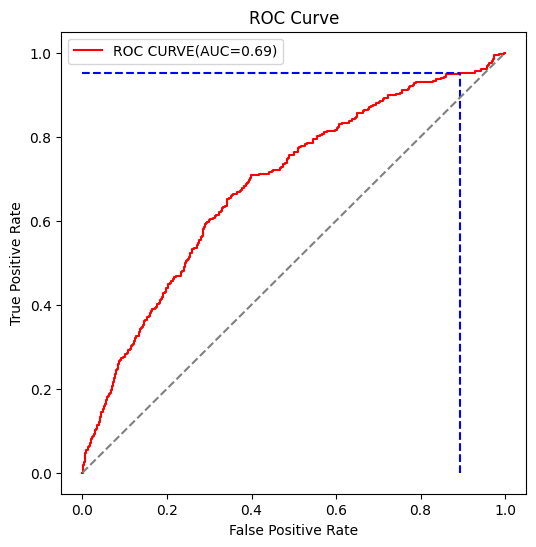

In [ ]:
# ROC curve building
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# AUC
roc_auc = auc(fpr, tpr)

# draw the graph
plt.figure(figsize = (6,6))
plt.plot(fpr, tpr, color ='red', label = f'ROC CURVE(AUC={roc_auc:.2f})')

plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], '--' , color= 'blue' )
plt.plot( [fpr[idx], fpr[idx]], [0, tpr[idx]], '--', color='blue')

plt.plot([0,1], [0,1], color ='gray', linestyle = '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.show()

In [ ]:
# compare testing and training results
from sklearn.metrics import accuracy_score

y_train_pred = log_model.predict(x_train_scaled)
print(f"Train sample accurancy:  {accuracy_score(y_train, y_train_pred):.3f} ")
print(f"test sample accurancy: {accuracy_score(y_test, y_pred):.3f}" )


Train sample accurancy:  0.692 
test sample accurancy: 0.621


damn what a weak model... almost guessing 50/50

#### Model building and testing -- Random Forest

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix,
    precision_recall_curve, average_precision_score
)

In [90]:
# create the model
rf_model = RandomForestClassifier()

rf_model = RandomForestClassifier(
    n_estimators= 500,
    max_depth=10,
    random_state= 42
)

rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

test it

In [91]:
# 1, Model Prediction
import numpy as np

rf_reg_pred = rf_model.predict_proba(x_test)

#get predict probabilities
rf_y_pred_prob = rf_reg_pred[:, 1]

rf_y_pred = rf_model.predict(x_test)

In [93]:
from sklearn import metrics

# accuracy
accuracy = metrics.accuracy_score(y_test, rf_y_pred)

# percision
percision = metrics.precision_score(y_test, rf_y_pred)

# recall
recall = metrics.recall_score(y_test, rf_y_pred)

# f1-score
f1 = metrics.f1_score(y_test, rf_y_pred)

In [94]:
from sklearn.metrics import confusion_matrix

# build confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
print(cm)

[[3170  514]
 [ 207  109]]


In [101]:
# ROC curve building
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred_prob)

roc_auc = auc(fpr, tpr)


In [ ]:

'''
idx_candidates = np.where(tpr > 0.95)[0]   # all indexes where TPR > 0.95
if len(idx_candidates) > 0:
    idx = idx_candidates[0]  # take the first one
else:
    idx = len(tpr) - 1  # fallback to the last valid index

In [98]:
# find the first index that the prediction it greater then 0.95
idx = np.min( np.where( tpr > 0.95))
idx

np.int64(539)

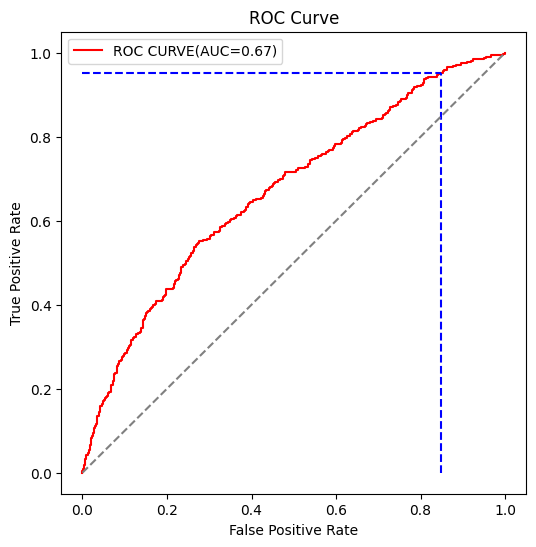

In [102]:
# draw the graph
plt.figure(figsize = (6,6))
plt.plot(fpr, tpr, color ='red', label = f'ROC CURVE(AUC={roc_auc:.2f})')

plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], '--' , color= 'blue' )
plt.plot( [fpr[idx], fpr[idx]], [0, tpr[idx]], '--', color='blue')

plt.plot([0,1], [0,1], color ='gray', linestyle = '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.show()

#### model building and testing -- LightGBM

In [103]:
!pip install lightgbm

In [104]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [110]:
# debug here :
# error " do not fit special charector in features name"

# we can drop all special charectors
import re

x_train_clean = x_train.rename(columns = lambda x: re.sub(r'[^A-Za-z0-9_]+', '_', x))
x_test_clean = x_test.rename(columns = lambda x: re.sub(r'[^A-Za-z0-9_]+', '_', x))

In [113]:
# build the model
lgb_model = LGBMClassifier(
    n_estimators = 500,
    max_depth = -1, # !!! -1 means no limits, lgb has default limits of "leaves number", and "min child samples". so don't worry about the limit
    learning_rate = 0.05,
    random_state = 42
)

lgb_model.fit(x_train_clean, y_train)

[LightGBM] [Info] Number of positive: 14738, number of negative: 14738
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8911
[LightGBM] [Info] Number of data points in the train set: 29476, number of used features: 163
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.05, n_estimators=500, random_state=42)

In [114]:
# 3. Predictions
y_pred = lgb_model.predict(x_test)          # hard predictions (0/1)
y_pred_prob = lgb_model.predict_proba(x_test)[:, 1]  # probabilities for ROC

In [116]:
# accuracy
accuracy = metrics.accuracy_score(y_test, rf_y_pred)

# percision
percision = metrics.precision_score(y_test, rf_y_pred)

# recall
recall = metrics.recall_score(y_test, rf_y_pred)

# f1-score
f1 = metrics.f1_score(y_test, rf_y_pred)

In [117]:
# build confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
print(cm)

[[3170  514]
 [ 207  109]]


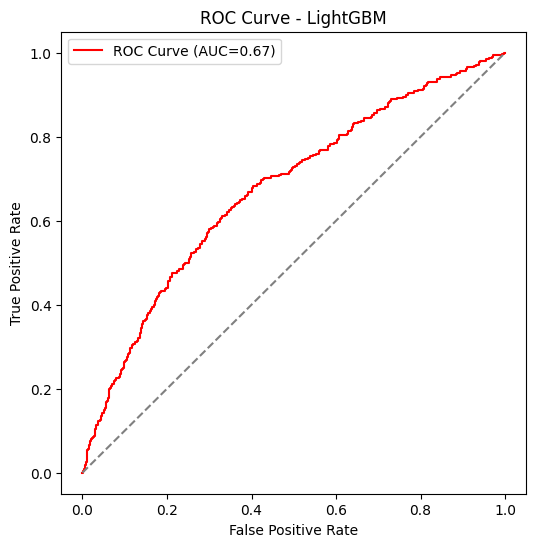

In [120]:
# 5. ROC Curve
from sklearn.metrics import(roc_auc_score,roc_curve)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC={roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend()
plt.show()
